In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
calories= pd.read_csv("calories.csv")
exercise= pd.read_csv("exercise.csv")

In [4]:
calories.head()



,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise_df= exercise.merge(calories, on="User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
print("The dataset has", exercise_df.shape[0], "instances(rows) and" ,exercise_df.shape[1], "features.")

The dataset has 15000 instances(rows) and 9 features.


In [8]:
print("columns:")
for i, col in enumerate(exercise_df.columns):
    print(f"{i+1}: {col}")


columns:
1: User_ID
2: Gender
3: Age
4: Height
5: Weight
6: Duration
7: Heart_Rate
8: Body_Temp
9: Calories


In [9]:
exercise_df.describe()   

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


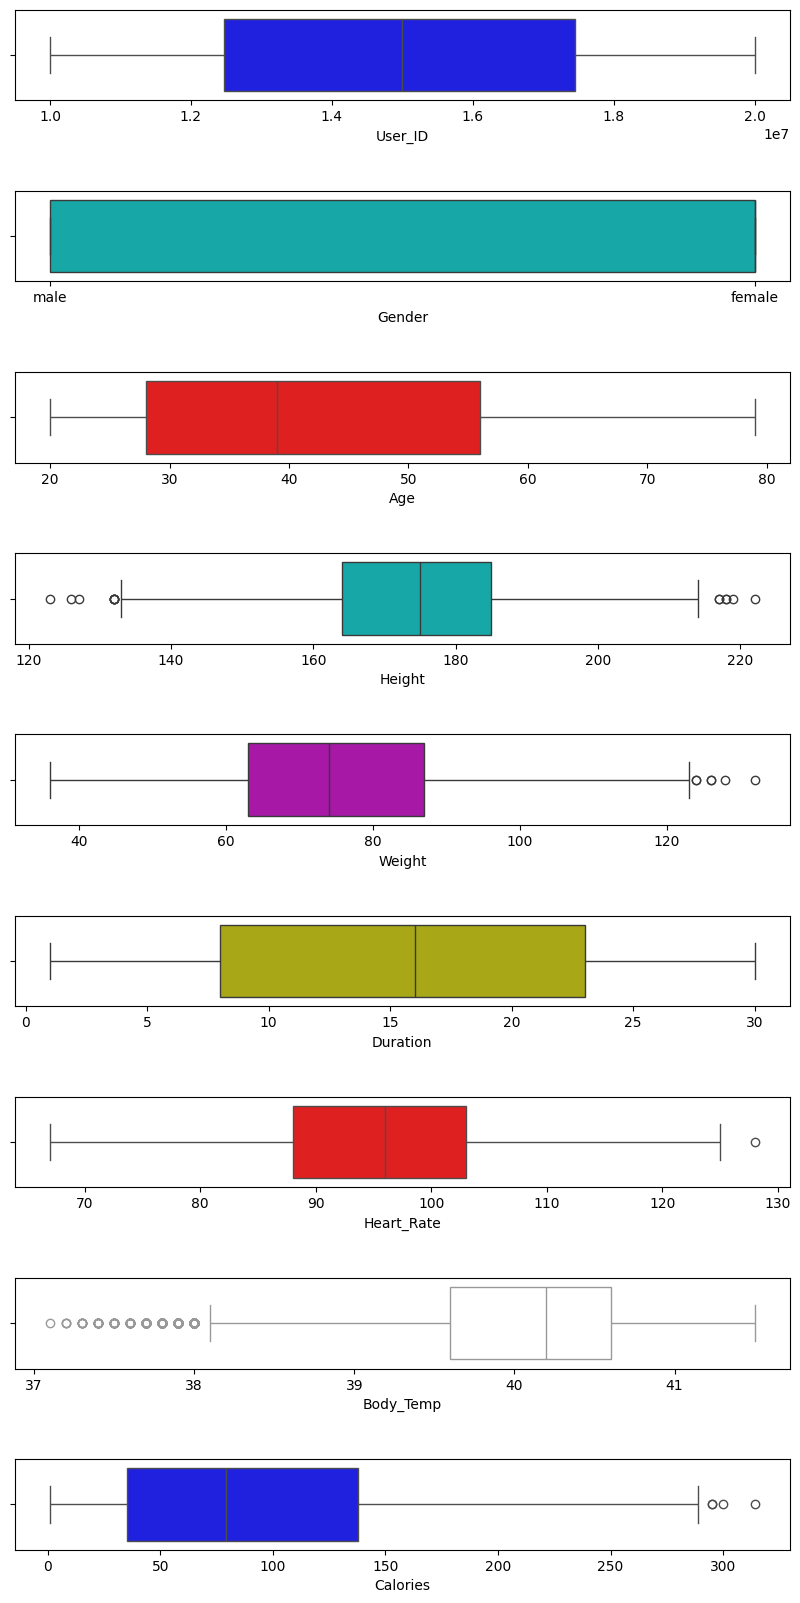

In [10]:
c=['b','c','r','c','m','y','r','w','b']
fig1, axes= plt.subplots(len(exercise_df.columns),1, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=1)
axes= axes.flatten()
for i,column in enumerate(exercise_df.columns):
    try:
        sns.boxplot(data = exercise_df, x= column, color= c[i], ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

In [11]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: >

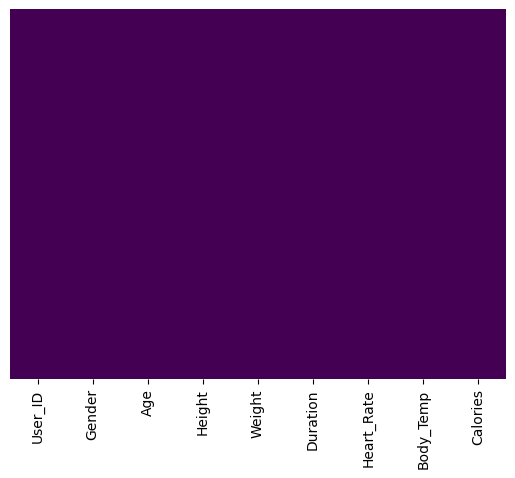

In [12]:
sns.heatmap(exercise_df.isnull(), yticklabels= False, cbar= False, cmap= "viridis")

In [13]:
print("The shape of dataset before dropping duplicates:",exercise_df.shape)
exercise_df.drop_duplicates(subset= ['User_ID'], keep='last', inplace=True)
print("The shape of dataset after dropping duplicates:",exercise_df.shape)

The shape of dataset before dropping duplicates: (15000, 9)
The shape of dataset after dropping duplicates: (15000, 9)


In [14]:
exercise_df.drop(columns="User_ID", inplace=True)

In [15]:
exercise_df.shape

(15000, 8)

In [16]:
exercise_train_data, exercise_test_data= train_test_split(exercise_df, train_size=0.8, random_state=1)

In [17]:
print("The shape of train data is:", exercise_train_data.shape)
print("The shape of test data is:", exercise_test_data.shape)


The shape of train data is: (12000, 8)
The shape of test data is: (3000, 8)


In [18]:
exercise_train_data.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0


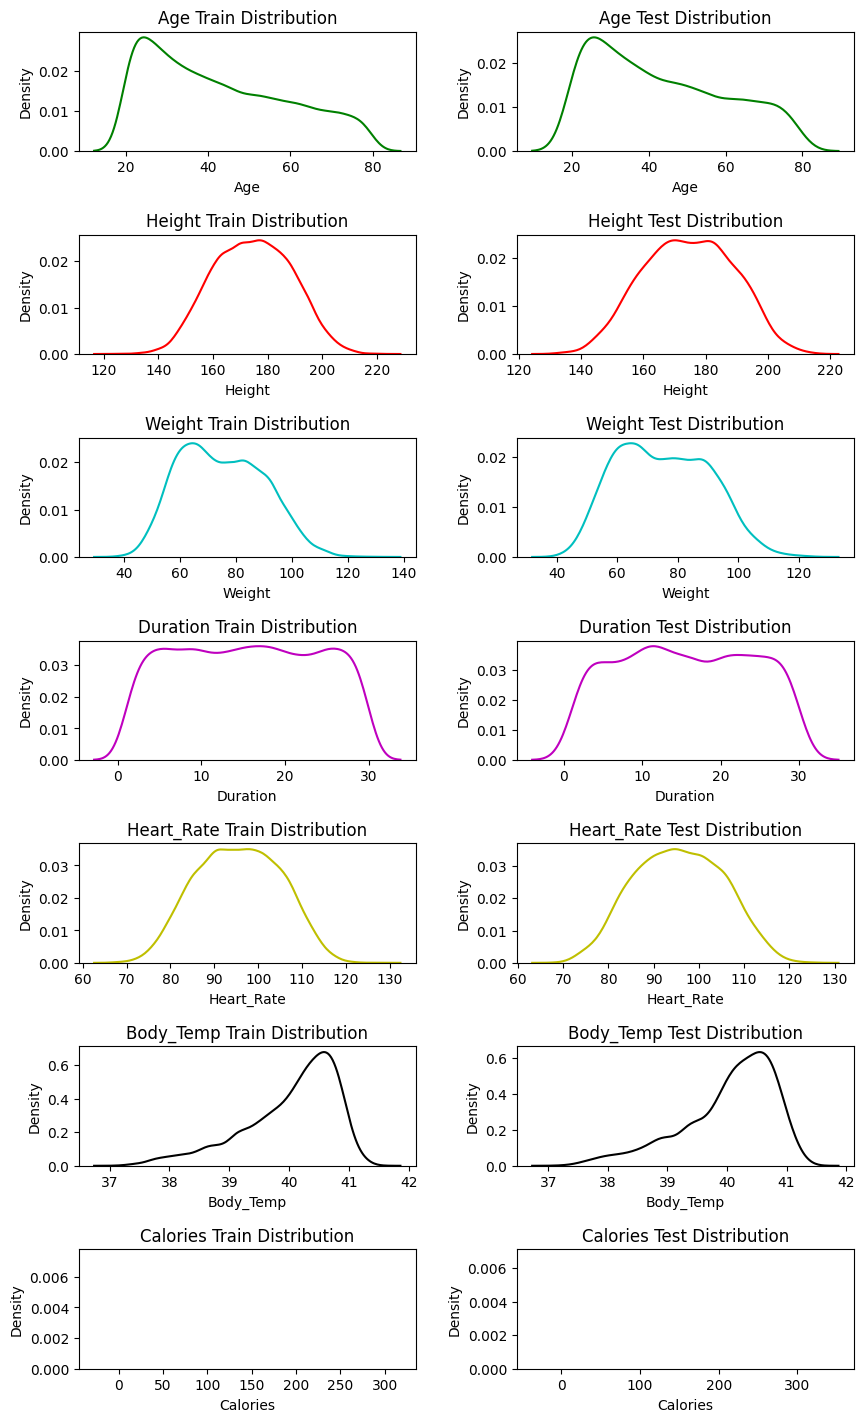

In [19]:
c= ['b','g','r','c','m','y','k','w','b']
fig1, axes= plt.subplots(len(exercise_train_data.columns), 2, figsize=(10, 20))
plt.subplots_adjust(wspace= 0.3, hspace=0.7)
axes= axes.flatten()

for i, column, color in zip(range(0, len(exercise_train_data.columns)*2, 2), exercise_train_data.columns, c):
    try:
        axes[i].title.set_text(column + " Train Distribution")
        sns.kdeplot(data= exercise_train_data, x= column, ax= axes[i], color=color)
    except:
        fig1.delaxes(axes[i])
        continue


for i, column, color in zip(range(1, len(exercise_train_data.columns)*2, 2), exercise_train_data.columns, c):
    try:
        axes[i].title.set_text(column + " Test Distribution")
        sns.kdeplot(data= exercise_test_data, x= column, ax= axes[i], color=color)
    except:
        fig1.delaxes(axes[i])
        continue

plt.show()


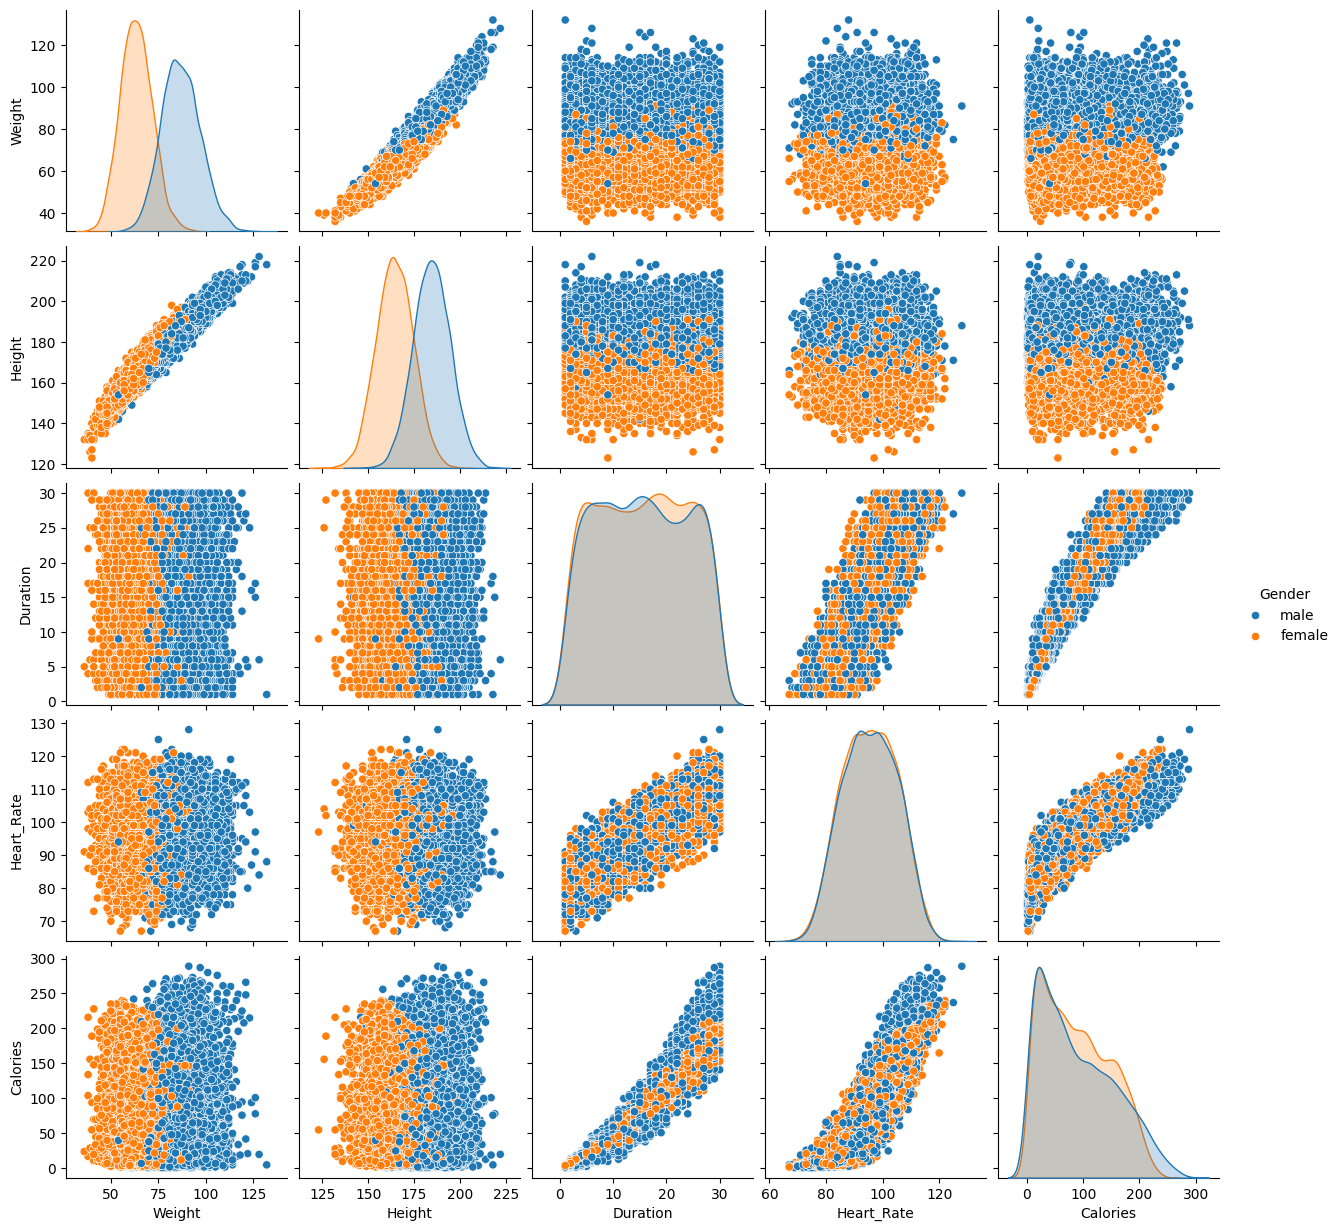

In [20]:
sns.pairplot(exercise_train_data[['Weight', 'Height','Duration', 'Heart_Rate', 'Calories', 'Gender']], hue= 'Gender')

In [21]:
print("Minimum age in the dataset is: ", exercise_train_data['Age'].min())
print("Maximum age in the dataset is: ", exercise_train_data['Age'].max())

Minimum age in the dataset is:  20
Maximum age in the dataset is:  79


In [22]:
age_groups= ['young', 'middle_age', 'old']
exercise_train_data["age_groups"]= pd.cut(exercise_train_data["Age"], bins=[20, 40, 60, 80], labels=age_groups)
exercise_train_data["age_groups"].value_counts()

age_groups
young         5839
middle_age    3465
old           2297
Name: count, dtype: int64

In [23]:
exercise_train_data["age_groups"].head()

2643            old
13352           old
13117           old
2560            old
14297    middle_age
Name: age_groups, dtype: category
Categories (3, object): ['young' < 'middle_age' < 'old']

In [24]:
exercise_train_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,old
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,old
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,old
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,old
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,middle_age


<Axes: xlabel='age_groups', ylabel='count'>

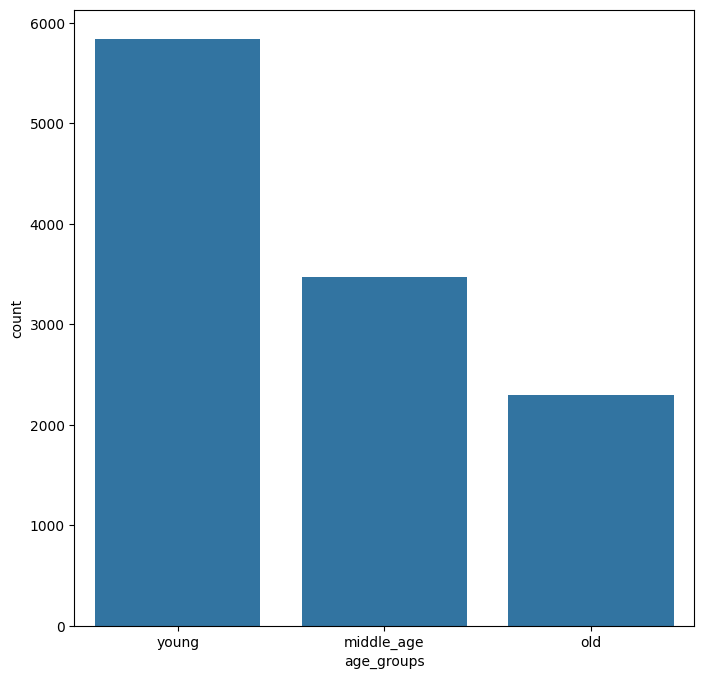

In [25]:
plt.rcParams["figure.figsize"]= 8, 8
sns.countplot(data= exercise_train_data, x= "age_groups")

In [26]:
fig= px.box(exercise_train_data, x= "age_groups", y= "Calories", color= "Gender")

fig.update_layout(
    title_text="Calories Burned by Age Group and Gender",
    width= 700,
    height= 500
)
fig.show()

In [27]:
fig= px.box(exercise_train_data, x= "age_groups", y= "Duration", color= "Gender")

fig.update_layout(
    title_text="Time Spent on Exercise by Age Group and Gender",
    width= 700,
    height= 500
)
fig.show()

In [28]:
print("The median exercise duration is:", exercise_train_data["Duration"].median())
print("The mean exercise duration is:", exercise_train_data["Duration"].mean())

The median exercise duration is: 16.0
The mean exercise duration is: 15.520083333333334


<Axes: xlabel='Gender', ylabel='count'>

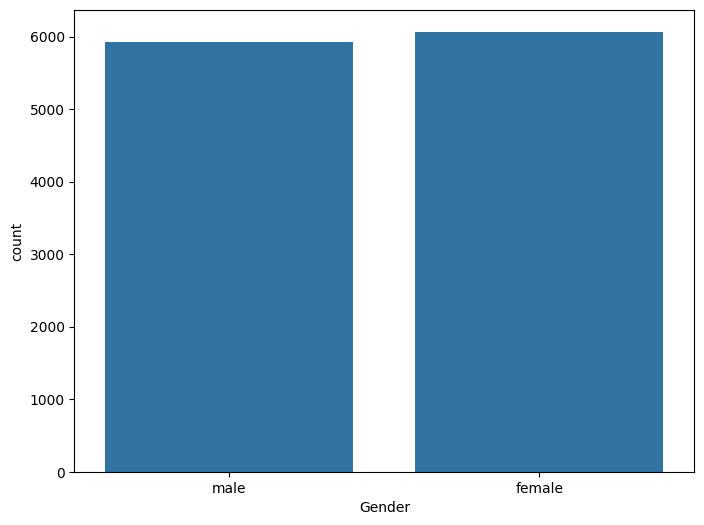

In [29]:
plt.rcParams["figure.figsize"]= 8,6
sns.countplot(data= exercise_train_data, x= "Gender")

In [30]:
fig1= px.box(exercise_train_data, x= "Gender", y= "Heart_Rate", color= "Gender")
fig1.show()

In [31]:
for data in [exercise_train_data, exercise_test_data]:
    data["BMI"]= data["Weight"]/ ((data["Height"]/100)**2)
    data["BMI"]= data["BMI"].round(2)
    print(data["BMI"].head())

2643     27.38
13352    25.06
13117    24.57
2560     26.15
14297    22.99
Name: BMI, dtype: float64
7576     24.98
10509    26.88
4253     23.74
5150     25.36
506      22.39
Name: BMI, dtype: float64


In [32]:
exercise_test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
7576,female,74,165.0,68.0,29.0,106.0,41.0,198.0,24.98
10509,male,43,186.0,93.0,13.0,97.0,39.9,72.0,26.88
4253,female,43,148.0,52.0,29.0,108.0,40.5,195.0,23.74
5150,male,62,182.0,84.0,4.0,83.0,38.9,17.0,25.36
506,female,37,173.0,67.0,15.0,94.0,40.0,74.0,22.39


In [33]:
BMI_category= ["Very severely underweight", "Severely underweight",
                "Underweight", "Normal", "Overweight", 
                "Moderately obese", "Severely obese", "Very severely obese"]

exercise_train_data["Categorized_BMI"]= pd.cut(exercise_train_data["BMI"], bins=[0, 15, 16, 18.5, 25, 30, 35, 40, 50], right=False, labels= BMI_category)

exercise_train_data["Categorized_BMI"]=exercise_train_data["Categorized_BMI"].astype("object")
exercise_train_data.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,middle_age,22.99,Normal


In [34]:
total= exercise_train_data["Categorized_BMI"].value_counts().reset_index()
total.columns= ["Categorized_BMI", 'count']
total                                                                                                                                                   

,Categorized_BMI,count
0,Normal,7819
1,Overweight,4181


<Axes: xlabel='Categorized_BMI', ylabel='count'>

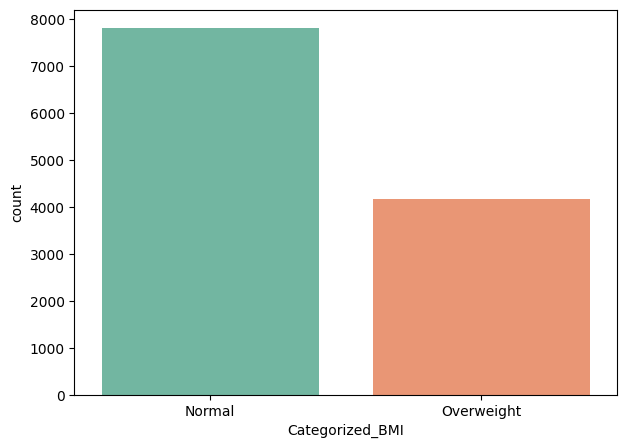

In [35]:
plt.rcParams["figure.figsize"]= 7,5
sns.barplot(data= total, x="Categorized_BMI", y= "count", palette="Set2")

In [36]:
total= exercise_train_data[["Gender", "Categorized_BMI"]].value_counts().reset_index()
print(total)

   Gender Categorized_BMI  count
0  female          Normal   5572
1    male      Overweight   3685
2    male          Normal   2247
3  female      Overweight    496


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
2643,male,62,172.0,81.0,14.0,88.0,40.5,68.0,old,27.38,Overweight
13352,male,77,182.0,83.0,28.0,108.0,40.8,241.0,old,25.06,Overweight
13117,female,73,170.0,71.0,16.0,91.0,40.2,83.0,old,24.57,Normal
2560,male,76,176.0,81.0,24.0,94.0,40.7,154.0,old,26.15,Overweight
14297,male,42,183.0,77.0,7.0,93.0,39.8,32.0,middle_age,22.99,Normal
...,...,...,...,...,...,...,...,...,...,...,...
905,female,25,162.0,62.0,19.0,99.0,40.6,101.0,young,23.62,Normal
5192,male,24,187.0,91.0,6.0,84.0,39.0,16.0,young,26.02,Overweight
12172,male,52,199.0,94.0,15.0,99.0,39.9,94.0,middle_age,23.74,Normal
235,female,70,175.0,74.0,9.0,79.0,40.0,34.0,old,24.16,Normal


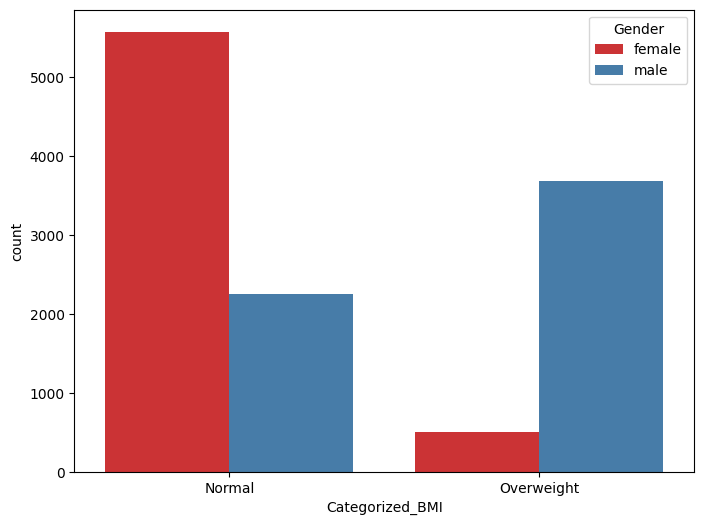

In [37]:
plt.rcParams["figure.figsize"]= 8,6
sns.barplot(data=total, x= "Categorized_BMI", y= "count", hue= "Gender", palette= "Set1")
exercise_train_data

In [38]:
total= exercise_train_data[["age_groups", "Categorized_BMI"]].value_counts().reset_index()
total

,age_groups,Categorized_BMI,count
0,young,Normal,4208
1,middle_age,Normal,2127
2,young,Overweight,1631
3,middle_age,Overweight,1338
4,old,Normal,1177
5,old,Overweight,1120


<Axes: xlabel='Categorized_BMI', ylabel='count'>

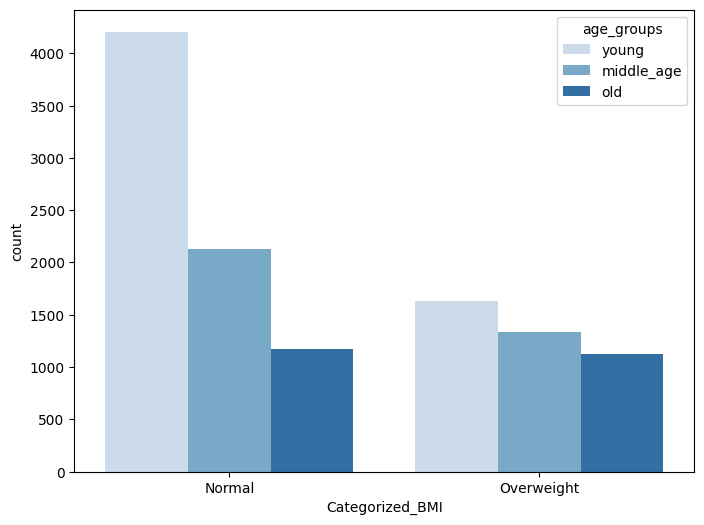

In [39]:
plt.rcParams["figure.figsize"]= 8,6
sns.barplot(data= total, x= "Categorized_BMI", y="count", hue= "age_groups", palette="Blues")

<Axes: >

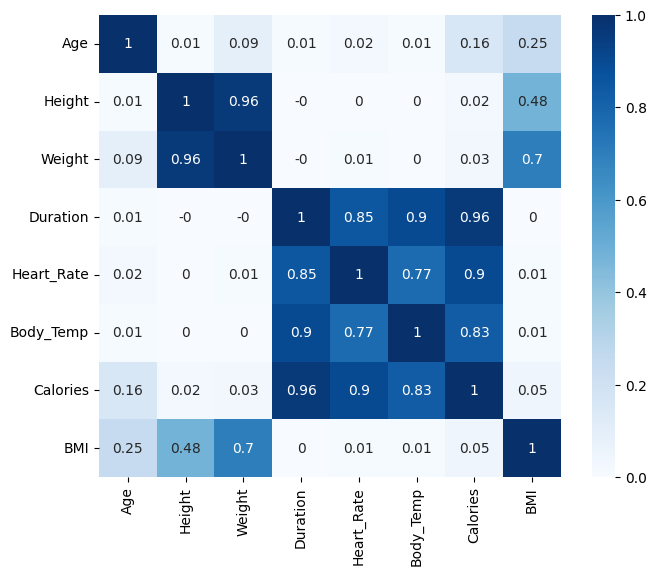

In [40]:
plt.rcParams["figure.figsize"]=8,6
corr= (exercise_train_data.corr(numeric_only=True)).round(2)
sns.heatmap(corr, annot=True, cmap='Blues', square=True)

In [43]:
print(exercise_train_data.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'age_groups', 'BMI', 'Categorized_BMI'],
      dtype='object')


In [45]:
exercise_train_data= exercise_train_data[["Age","Gender", "BMI", "Duration", "Calories", "Heart_Rate", "Body_Temp"]]
exercise_test_data= exercise_test_data[["Age","Gender", "BMI", "Duration", "Calories", "Heart_Rate", "Body_Temp"]]
exercise_train_data= pd.get_dummies(exercise_train_data, drop_first= True)
exercise_test_data= pd.get_dummies(exercise_test_data, drop_first= True)
print(exercise_train_data)

KeyError: "['Gender'] not in index"

In [46]:
x_train= exercise_train_data.drop("Calories", axis=1)
y_train= exercise_train_data["Calories"]

x_test= exercise_test_data.drop("Calories", axis=1)
y_test= exercise_test_data["Calories"]

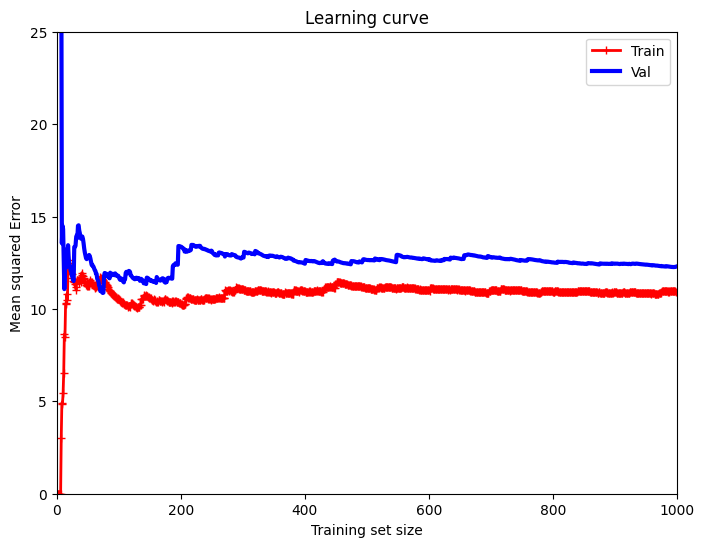

In [47]:
train_errors, val_errors = [], []
def plot_learning_curve(model):
    for m in range(1, 1000):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict= model.predict(x_train[:m])
        y_val_predict= model.predict(x_test[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test[:m], y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth= 2, label= "Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth= 3, label= "Val")
    plt.title("Learning curve")
    plt.xlabel("Training set size")
    plt.ylabel("Mean squared Error")
    plt.xlim([0,1000])
    plt.ylim([0,25])
    plt.legend()
    
linreg= LinearRegression()
plot_learning_curve(linreg)

In [48]:
linreg= LinearRegression()
linreg.fit(x_train, y_train)
linreg_prediction= linreg.predict(x_test)


In [49]:
print("Linear regression Mean Absolute Error (MAE):", round(metrics.mean_absolute_error(y_test, linreg_prediction), 2))
print("Linear regression Mean Squared Error (MSE):", round(metrics.mean_squared_error(y_test, linreg_prediction), 2))
print("Linear regression Root Squared Error (RSE):", round(np.sqrt(metrics.mean_squared_error(y_test, linreg_prediction)), 2))

Linear regression Mean Absolute Error (MAE): 8.52
Linear regression Mean Squared Error (MSE): 140.08
Linear regression Root Squared Error (RSE): 11.84


In [50]:
random_reg= RandomForestRegressor(n_estimators= 1000, max_features= 3, max_depth=6)
random_reg.fit(x_train, y_train)
random_reg_prediction= random_reg.predict(x_test)

In [51]:
print("RandomForest Mean Absolute Error: ", round(metrics.mean_absolute_error(y_test, random_reg_prediction), 2))
print("RandomForest Mean Squared Error: ", round(metrics.mean_squared_error(y_test, random_reg_prediction), 2))
print("RandomForest Root Mean Squared Error: ", round(np.sqrt(metrics.mean_squared_error(y_test, random_reg_prediction)), 2))

RandomForest Mean Absolute Error:  5.32
RandomForest Mean Squared Error:  68.94
RandomForest Root Mean Squared Error:  8.3


In [52]:
exercise_train_data.iloc[32]

Age               23
BMI            24.88
Duration        27.0
Calories       140.0
Heart_Rate     102.0
Body_Temp       40.3
Gender_male     True
Name: 5897, dtype: object

In [53]:
x_array= np.array([[24, 25, 28, 40, 100, 1]]).reshape(1,-1)
y_pred= random_reg.predict(x_array)
print("Prediction:", round(y_pred[0], 2))

Prediction: 134.55


In [54]:
print(exercise_train_data.columns)


Index(['Age', 'BMI', 'Duration', 'Calories', 'Heart_Rate', 'Body_Temp',
       'Gender_male'],
      dtype='object')
